In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/diab_diag_data.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Height (m),Weight (kg)
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,5,10,999999,0.0,F,-1,4.0,5.0,1.564712,36.724834
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,2,0,0,0.0,f,11,4.0,3.0,1.648901,76.128517
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,2,10,0,0.0,Female,9,4.0,7.0,1.645329,89.334587
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,5,0,30,1.0,Male,12,3.0,4.0,1.763294,90.166989
4,0.0,0,0.0,1,24.0,1.0,NaN,0.0,0,0,...,3,0,0,1.0,M,-1,5.0,6.0,1.782033,76.215420


In [4]:
df['Sex'] = df['Sex'].replace(['f','Female','Woman'], 'F')
df['Sex'] = df['Sex'].replace(['m','Male','Man'], 'M')

In [5]:
df = pd.get_dummies(df, columns=['Sex'])

In [6]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Height (m),Weight (kg),Sex_F,Sex_M
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,10,999999,0.0,-1,4.0,5.0,1.564712,36.724834,True,False
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,0,0,0.0,11,4.0,3.0,1.648901,76.128517,True,False
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,10,0,0.0,9,4.0,7.0,1.645329,89.334587,True,False
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,0,30,1.0,12,3.0,4.0,1.763294,90.166989,False,True
4,0.0,0,0.0,1,24.0,1.0,NaN,0.0,0,0,...,0,0,1.0,-1,5.0,6.0,1.782033,76.215420,False,True


In [7]:
print(df['Stroke'].unique())

[ 0.  1. nan]


In [8]:
print(df['PhysHlth'].unique())

[999999      0     30     25      4     10      2      3     15      8
     13     14     20      1      5      7      6     18      9     16
     26     28     21     12     27     29     11     17     19     24
     23     22]


In [9]:
nan_percentage = df['Stroke'].isna().mean() * 100

print(f"Percentage of NaN values: {nan_percentage:.2f}%")

Percentage of NaN values: 36.46%


In [10]:
(df['PhysHlth'] == 999999).sum()

16159

In [11]:
df = df.dropna(subset=['Smoker'])

In [12]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Height (m),Weight (kg),Sex_F,Sex_M
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,10,999999,0.0,-1,4.0,5.0,1.564712,36.724834,True,False
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,0,0,0.0,11,4.0,3.0,1.648901,76.128517,True,False
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,10,0,0.0,9,4.0,7.0,1.645329,89.334587,True,False
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,0,30,1.0,12,3.0,4.0,1.763294,90.166989,False,True
4,0.0,0,0.0,1,24.0,1.0,NaN,0.0,0,0,...,0,0,1.0,-1,5.0,6.0,1.782033,76.215420,False,True


In [13]:
df = df[df['PhysHlth'] != 999999]


In [14]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Height (m),Weight (kg),Sex_F,Sex_M
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,0,0,0.0,11,4.0,3.0,1.648901,76.128517,True,False
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,10,0,0.0,9,4.0,7.0,1.645329,89.334587,True,False
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,0,30,1.0,12,3.0,4.0,1.763294,90.166989,False,True
4,0.0,0,0.0,1,24.0,1.0,NaN,0.0,0,0,...,0,0,1.0,-1,5.0,6.0,1.782033,76.215420,False,True
6,0.0,1,1.0,1,27.0,1.0,0.0,0.0,0,0,...,25,0,0.0,10,5.0,3.0,1.451583,56.891483,True,False


In [15]:
df['Age'] = df['Age'].replace(-1, np.nan)

In [21]:
from sklearn.linear_model import LinearRegression
# Create a new DataFrame for rows where 'Age' is not missing
train_df = df.dropna(subset=['Age'])

# Prepare the training data
X_train = train_df[['Height (m)', 'Weight (kg)']]  # Features
y_train = train_df['Age']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Prepare the data for prediction (rows where 'Age' is missing)
predict_df = df[df['Age'].isna()]
X_predict = predict_df[['Height (m)', 'Weight (kg)']]

# Predict missing 'Age' values
predicted_ages = model.predict(X_predict)

# Fill missing 'Age' values with the predictions
df.loc[df['Age'].isna(), 'Age'] = predicted_ages

df['Age']=df['Age'].round()


In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Height (m),Weight (kg),Sex_F,Sex_M
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,0,0,0.0,11.0,4.0,3.0,1.648901,76.128517,True,False
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,10,0,0.0,9.0,4.0,7.0,1.645329,89.334587,True,False
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,0,30,1.0,12.0,3.0,4.0,1.763294,90.166989,False,True
4,0.0,0,0.0,1,24.0,1.0,NaN,0.0,0,0,...,0,0,1.0,8.0,5.0,6.0,1.782033,76.215420,False,True
6,0.0,1,1.0,1,27.0,1.0,0.0,0.0,0,0,...,25,0,0.0,10.0,5.0,3.0,1.451583,56.891483,True,False


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Separate rows with NaN values in 'Stroke'
df_missing = df[df['Stroke'].isna()]

# Separate rows with non-NaN values in 'Stroke'
df_no_missing = df.dropna(subset=['Stroke'])

# Prepare the features (X) and target (y) for training
X_no_missing = df_no_missing[['HighBP', 'HighChol']]
y_no_missing = df_no_missing['Stroke']

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_no_missing, y_no_missing)

# Use the trained model to predict the missing 'Stroke' values
X_missing = df_missing[['HighBP', 'HighChol']]  # Features for rows with missing Stroke values
predicted_stroke = model.predict(X_missing)

# Fill in the NaN values in the original dataframe with the predicted values
df.loc[df['Stroke'].isna(), 'Stroke'] = predicted_stroke


In [23]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Height (m),Weight (kg),Sex_F,Sex_M
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,0,0,0.0,11.0,4.0,3.0,1.648901,76.128517,True,False
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,10,0,0.0,9.0,4.0,7.0,1.645329,89.334587,True,False
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,0,30,1.0,12.0,3.0,4.0,1.763294,90.166989,False,True
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,0,0,1.0,8.0,5.0,6.0,1.782033,76.215420,False,True
6,0.0,1,1.0,1,27.0,1.0,0.0,0.0,0,0,...,25,0,0.0,10.0,5.0,3.0,1.451583,56.891483,True,False


In [24]:
df['Stroke'].unique()

array([0., 1.])

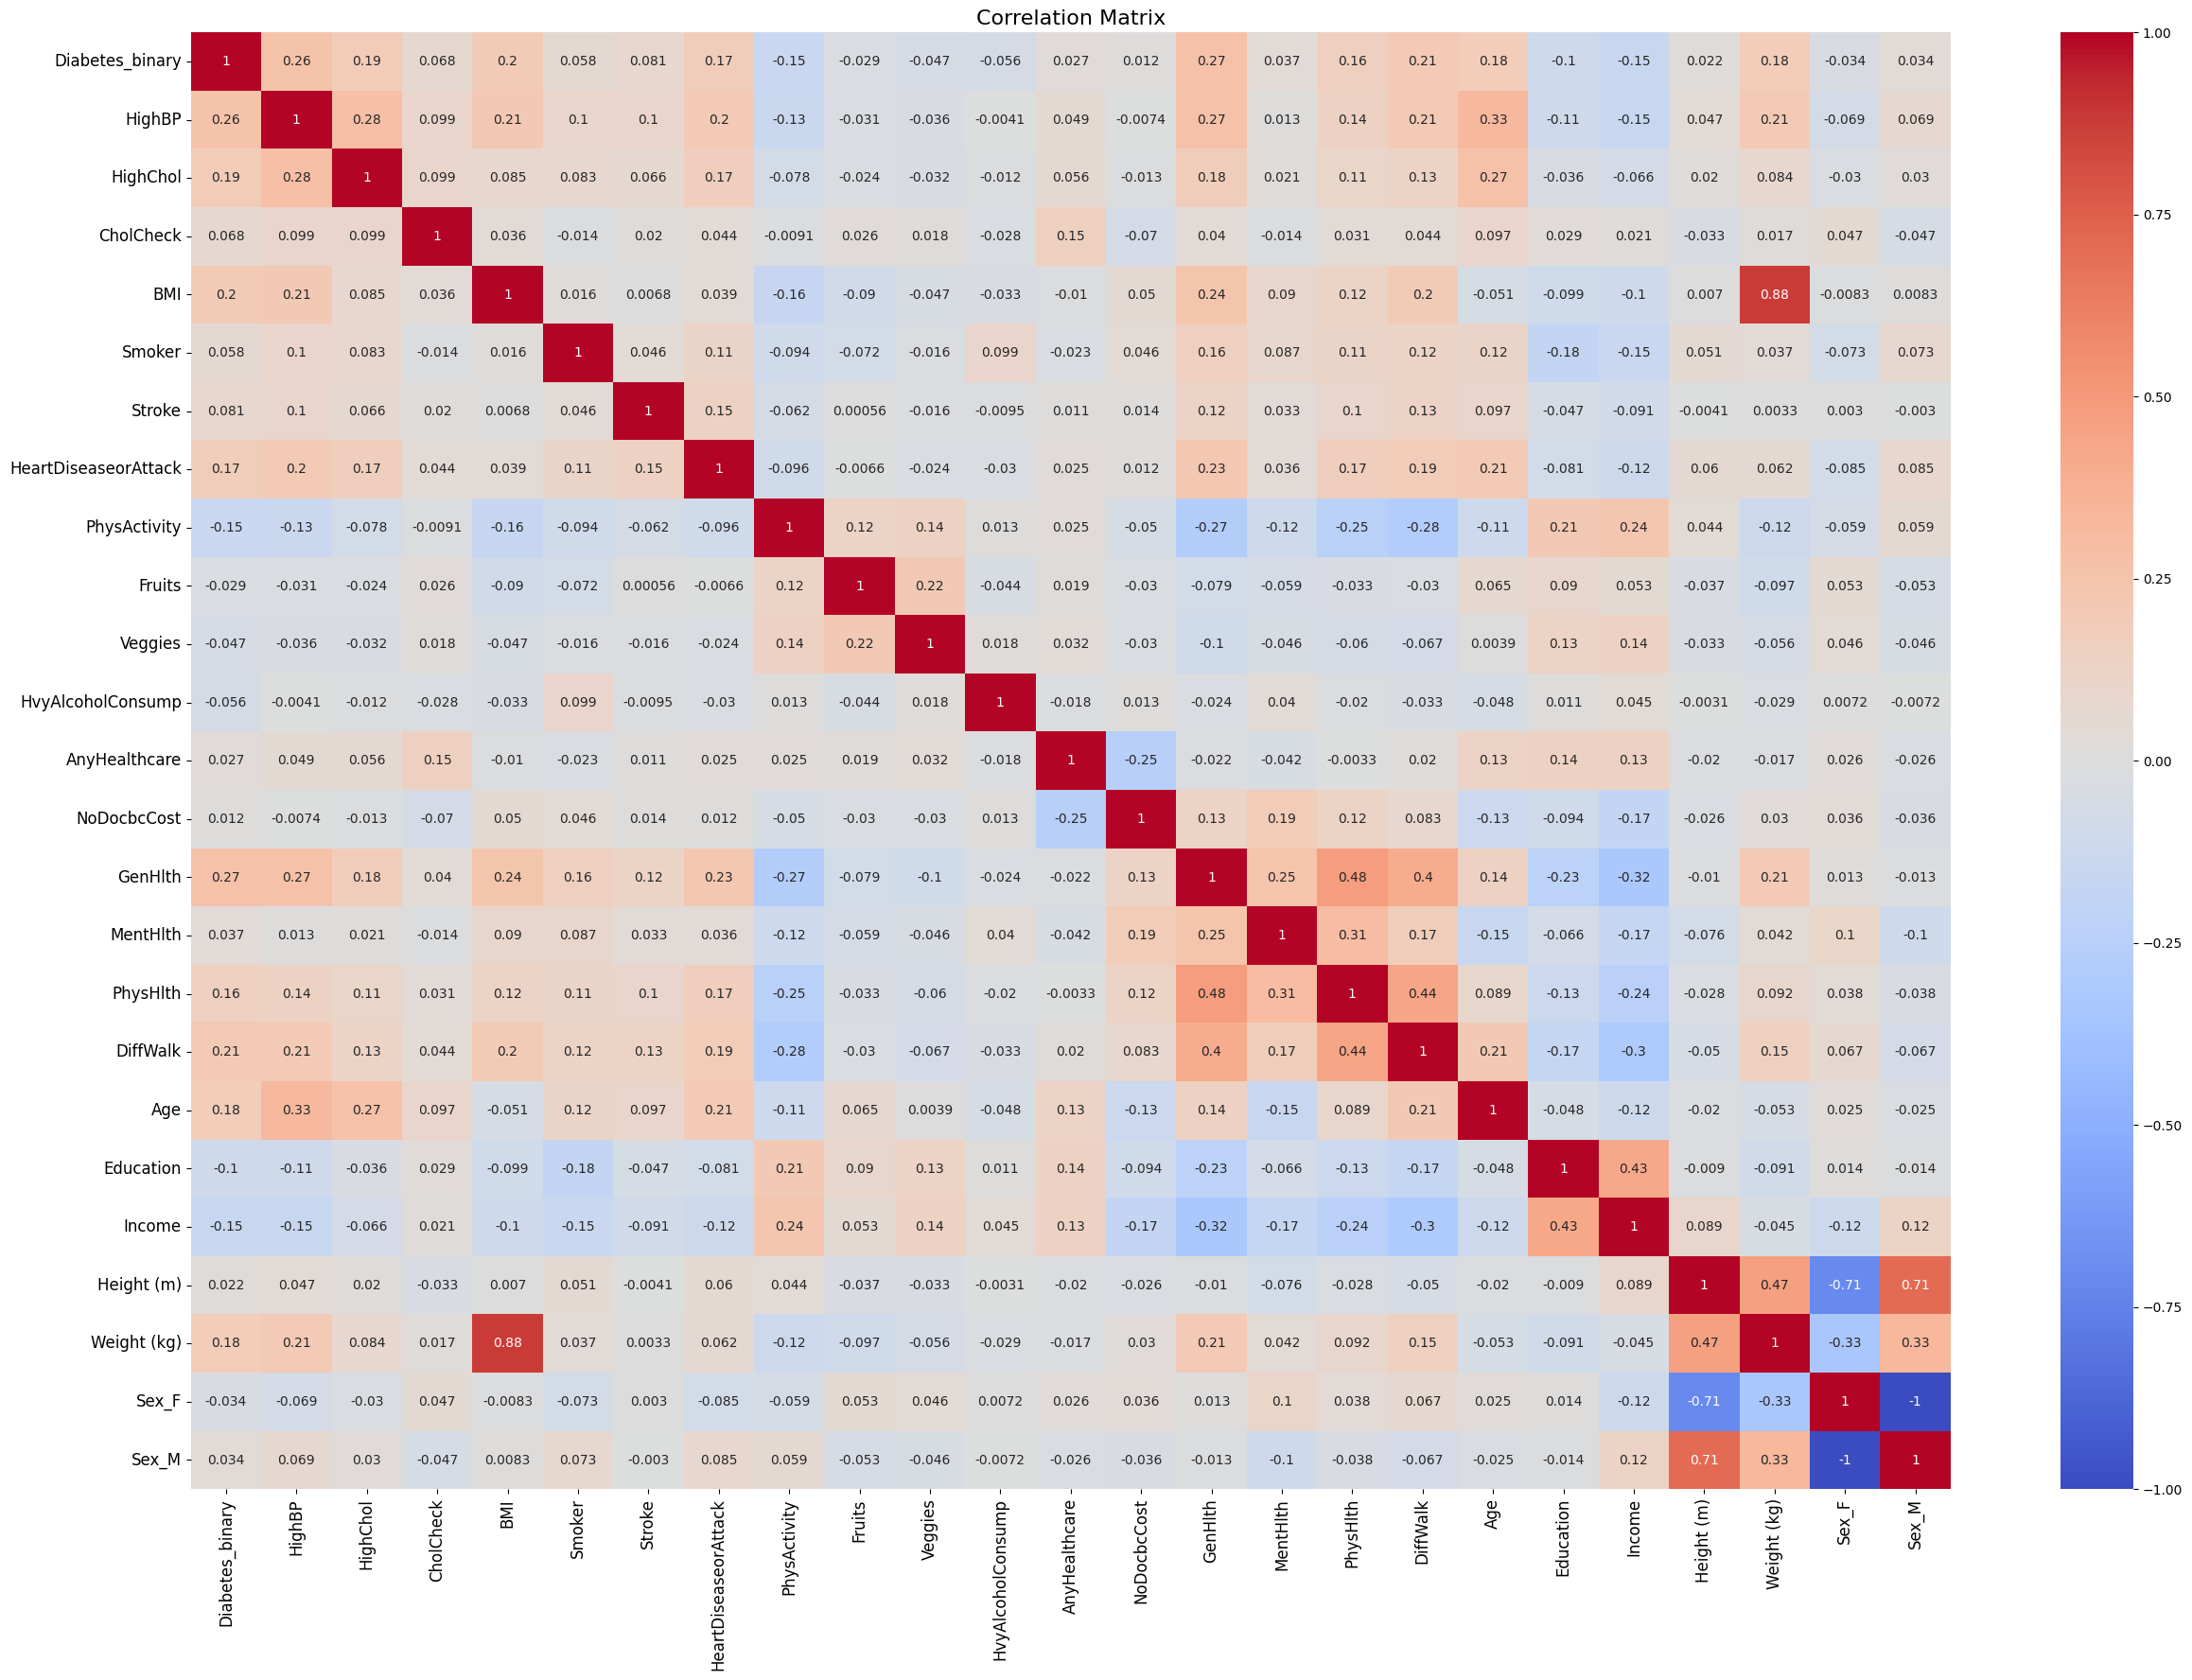

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(30, 20))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocess data
X = df[['BMI','DiffWalk', 'GenHlth', 'HighBP', 'HighChol', 'Age']]
#df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
threshold = 1.0
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= threshold).astype(int)  # Classify as 1 if probability is >= 0.3, otherwise 0

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Confusion Matrix:
[[32722   597]
 [ 4809   670]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     33319
         1.0       0.53      0.12      0.20      5479

    accuracy                           0.86     38798
   macro avg       0.70      0.55      0.56     38798
weighted avg       0.82      0.86      0.82     38798



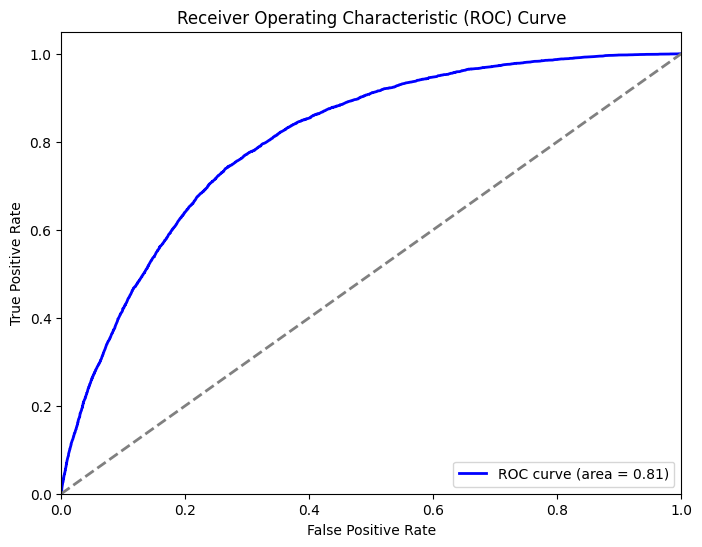

In [27]:
from sklearn.metrics import roc_curve, auc
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()